In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data import and exploration


In [2]:
data = pd.read_csv("iris.txt")
print(data.shape)
print(type(data))
print(data.info())
data.describe()
print(data.dtypes)
data.columns = data.columns.str.strip()
print(data.columns)

FileNotFoundError: File b'iris.txt' does not exist

# Data manipulation


In [48]:
print(data["sepal_length"].head())
print(data.loc[:5,"sepal_length"])
print(data.iloc[0:5,1:5])
print(data.loc[2:3]) # this prints 2 lines
print(data.iloc[2:3]) # this only prints 1 line
print(data.iloc[0,1:3]) # this prints 2 values

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64
0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
Name: sepal_length, dtype: float64
    sepal_width   petal_length   petal_width      species
0           3.5            1.4           0.2  Iris-setosa
1           3.0            1.4           0.2  Iris-setosa
2           3.2            1.3           0.2  Iris-setosa
3           3.1            1.5           0.2  Iris-setosa
4           3.6            1.4           0.2  Iris-setosa
   sepal_length   sepal_width   petal_length   petal_width      species
2           4.7           3.2            1.3           0.2  Iris-setosa
3           4.6           3.1            1.5           0.2  Iris-setosa
   sepal_length   sepal_width   petal_length   petal_width      species
2           4.7           3.2            1.3           0.2  Iris-setosa
 sepal_width     3.5
 petal_length    1.4
Name: 0, dtype: object


In [60]:
data["species_cat"] = data["species"].astype("category")
print(data.dtypes)
print(data.species_cat.cat.categories)

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species           object
species_cat     category
dtype: object
Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [106]:
print(pd.isnull(data).sum())
data["na_col"] = [np.random.randint(10) for x in data.species]
na_inds = np.random.choice(np.arange(0,len(data)-1),10, replace = False)
data.loc[na_inds, "na_col"] = np.nan
pd.isnull(data).sum()

sepal_length     0
sepal_width      0
petal_length     0
petal_width      0
species          0
species_cat      0
na_col          10
dtype: int64


sepal_length     0
sepal_width      0
petal_length     0
petal_width      0
species          0
species_cat      0
na_col          10
dtype: int64

In [109]:
avg = data.na_col.mean()
data.na_col = data.na_col.fillna(avg)
pd.isnull(data).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_cat     0
na_col          0
dtype: int64

In [112]:
print(data.iloc[:,0:4].apply(np.std, axis=0))

sepal_length    0.825301
sepal_width     0.432147
petal_length    1.758529
petal_width     0.760613
dtype: float64


In [114]:
pd.melt(data, id_vars="species")

,species,variable,value
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_length,4.9
2,Iris-setosa,sepal_length,4.7
3,Iris-setosa,sepal_length,4.6
4,Iris-setosa,sepal_length,5
5,Iris-setosa,sepal_length,5.4
6,Iris-setosa,sepal_length,4.6
7,Iris-setosa,sepal_length,5
8,Iris-setosa,sepal_length,4.4
9,Iris-setosa,sepal_length,4.9


In [120]:
data.groupby("species").mean()

,sepal_length,sepal_width,petal_length,petal_width,na_col
species,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,3.921714
Iris-versicolor,5.936,2.770,4.260,1.326,4.324286
Iris-virginica,6.588,2.974,5.552,2.026,3.882571


---
## Error

In [24]:
data.iloc[0:5,"species"]
data.loc["species"]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

---
# visualisation

## Matlplot lib

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64


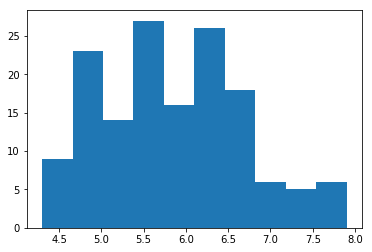

In [43]:
print(data.sepal_length.describe())
plt.hist(data["sepal_length"])
plt.show()

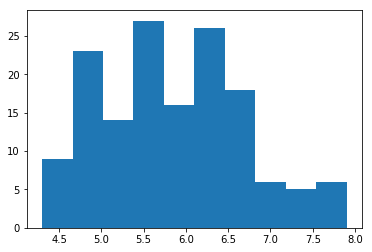

In [45]:
plt.hist(data["sepal_length"])
plt.show()

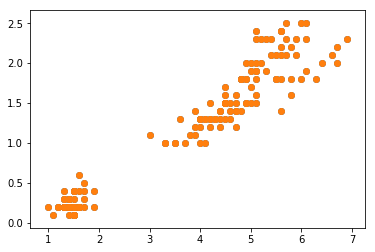

In [122]:
plt.scatter(data.petal_length, data.petal_width)
plt.show()

## Pandas plotting

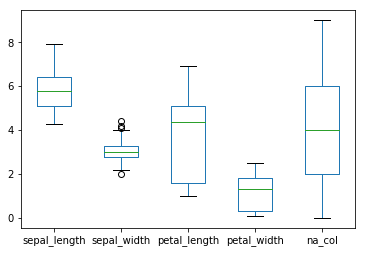

In [126]:
data.plot(kind="box")
plt.show()

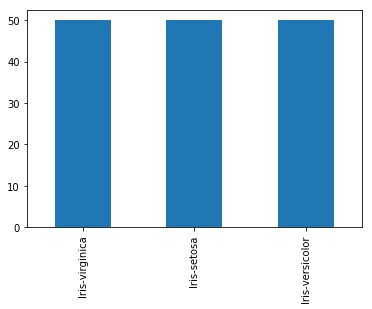

In [129]:
data.species.value_counts().plot(kind="bar")
plt.show()

## seaborn plotting

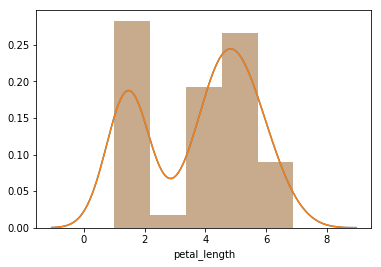

In [131]:
sns.distplot(data.petal_length)
plt.show()

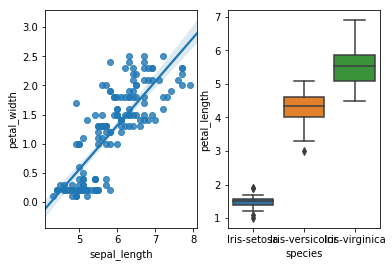

In [135]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(x = "sepal_length", y="petal_width", data=data, ax=ax1)
sns.boxplot(x = "species", y = "petal_length", data=data, ax=ax2)
plt.show()

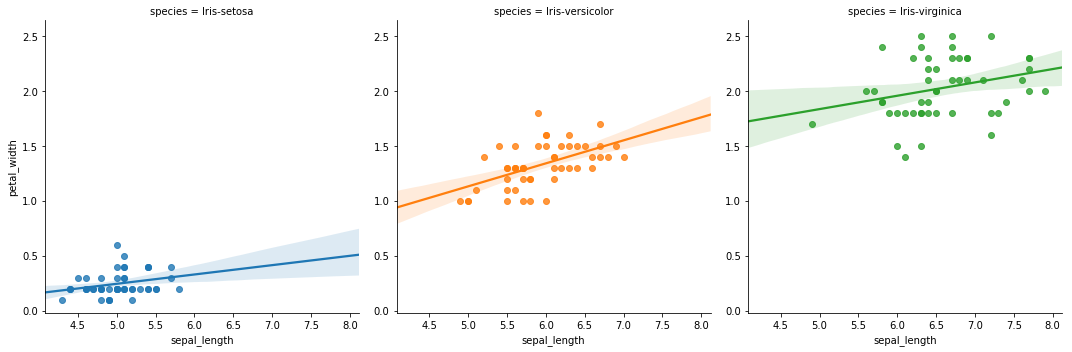

In [138]:
sns.lmplot(x = "sepal_length", y="petal_width", data=data, col="species", hue="species")
plt.show()

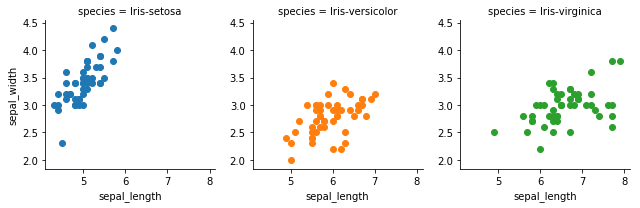

In [139]:
facet = sns.FacetGrid(data, col="species", hue="species")
facet.map(plt.scatter, "sepal_length", "sepal_width")
plt.show()


# Modeling

## Species Classification

### Random forest 

In [228]:
y = data.species
X = data.drop(["species", "species_cat", "na_col"], axis=1)
print(X.head())
feature_list = list(X.columns)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


(105, 4)
Accuracy: 1.0
Confusion matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Most important features : 
 petal_length    0.428680
petal_width     0.413169
sepal_length    0.118277
sepal_width     0.039874
dtype: float64


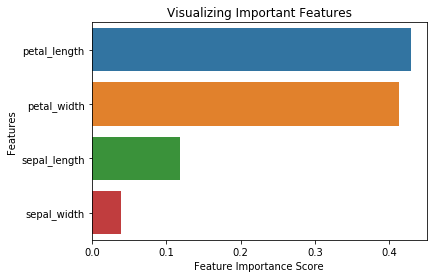

In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix: \n",confusion_matrix(y_test, y_pred))

feature_imp = pd.Series(rf.feature_importances_, index = feature_list).sort_values(ascending=False)
print("Most important features : \n",feature_imp)

%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

(45, 3)
Accuracy: 0.942857142857
petal_width     0.434825
petal_length    0.376789
sepal_length    0.188386
dtype: float64


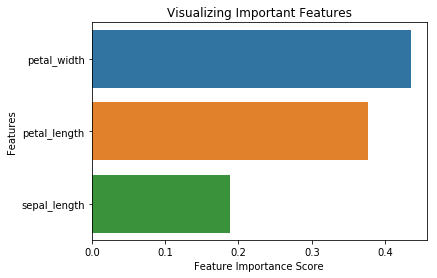

In [240]:
from sklearn.model_selection import train_test_split

X = data.drop(["species", "species_cat", "na_col", "sepal_width"], axis=1)
feature_list = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 42)
print(X_train.shape)

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

feature_imp = pd.Series(rf.feature_importances_, index = feature_list).sort_values(ascending=False)
print(feature_imp)

%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Sepal length prediction

### 1. Random Forest 

   sepal_width  petal_length  petal_width      species
0          3.5           1.4          0.2  Iris-setosa
1          3.0           1.4          0.2  Iris-setosa
2          3.2           1.3          0.2  Iris-setosa
3          3.1           1.5          0.2  Iris-setosa
4          3.6           1.4          0.2  Iris-setosa
(105, 6)
RMSE = 1.88
Accuracy: 96.0 %.
Variable: petal_length         Importance: 0.85
Variable: sepal_width          Importance: 0.07
Variable: petal_width          Importance: 0.06
Variable: species_Iris-versicolor Importance: 0.01
Variable: species_Iris-setosa  Importance: 0.0
Variable: species_Iris-virginica Importance: 0.0
petal_length               0.854472
sepal_width                0.070017
petal_width                0.059516
species_Iris-versicolor    0.013278
species_Iris-virginica     0.002223
species_Iris-setosa        0.000494
dtype: float64


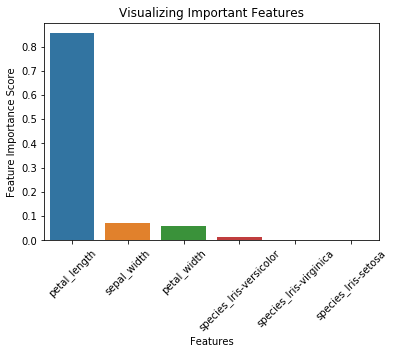

In [320]:
y = data.sepal_length
X = data.drop(["sepal_length", "species_cat", "na_col"], axis=1)
print(X.head())
X =pd.get_dummies(X)
feature_list = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

MSE = ((y_pred - y_test)**2).sum()

print('RMSE =', round(np.sqrt(MSE), 2))

mape = 100 * (abs(y_pred - y_test) / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_imp = pd.Series(rf.feature_importances_, index = feature_list).sort_values(ascending=False)
print(feature_imp)

%matplotlib inline
plot = sns.barplot(y=feature_imp, x=feature_imp.index)

for x in plot.get_xticklabels():
    x.set_rotation(45)

plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.show()

   sepal_width  petal_length  petal_width
0          3.5           1.4          0.2
1          3.0           1.4          0.2
2          3.2           1.3          0.2
3          3.1           1.5          0.2
4          3.6           1.4          0.2
(105, 3)
RMSE = 1.93
Accuracy: 96.02 %.
Variable: petal_length         Importance: 0.87
Variable: sepal_width          Importance: 0.09
Variable: petal_width          Importance: 0.04
petal_length    0.871306
sepal_width     0.085177
petal_width     0.043518
dtype: float64


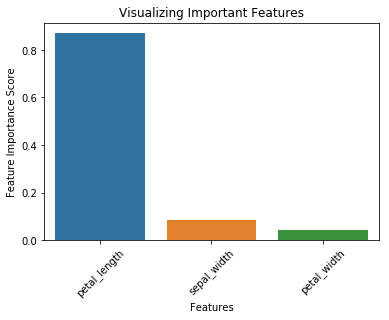

In [319]:
y = data.sepal_length
X = data.drop(["sepal_length", "species_cat", "na_col","species"], axis=1)
print(X.head())
feature_list = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

MSE = ((y_pred - y_test)**2).sum()

print('RMSE =', round(np.sqrt(MSE), 2))

mape = 100 * (abs(y_pred - y_test) / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_imp = pd.Series(rf.feature_importances_, index = feature_list).sort_values(ascending=False)
print(feature_imp)

%matplotlib inline
plot = sns.barplot(y=feature_imp, x=feature_imp.index)

for x in plot.get_xticklabels():
    x.set_rotation(45)

plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 2. Linear regression 

In [1]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

MSE = ((y_pred - y_test)**2).sum()

print('RMSE =', round(np.sqrt(MSE), 2))

mape = 100 * (abs(y_pred - y_test) / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


NameError: name 'X_train' is not defined

In [314]:
y = data.sepal_length
X = data.drop(["sepal_length", "species_cat", "na_col", "species"], axis=1)
print(X.head())
feature_list = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

MSE = ((y_pred - y_test)**2).sum()

print('RMSE =', round(np.sqrt(MSE), 2))

mape = 100 * (abs(y_pred - y_test) / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

print("training R2 = ",lr.score(X_train, y_train))
print("testing R2 = ",lr.score(X_test, y_test))

   sepal_width  petal_length  petal_width
0          3.5           1.4          0.2
1          3.0           1.4          0.2
2          3.2           1.3          0.2
3          3.1           1.5          0.2
4          3.6           1.4          0.2
(105, 3)
RMSE = 2.1
Accuracy: 95.68 %.
training R2 =  0.858828925585
testing R2 =  0.852320700588
